In [ ]:
import math
import matplotlib.pyplot as plt

class Robot:
    
    def __init__(self, name):
        self.name = name
        self.x = 0.0
        self.y = 0.0
        self.direction = 0.0
        self.speed = 0.0
        self.history = [(self.x, self.y)]
        self.dt = 0.001  
        self.angular_speed = 0.0

    def get_position(self):
        return (self.x, self.y)

    def get_direction(self):
        return self.direction

    def get_speed(self):
        return self.speed

    def set_direction(self, new_direction):
        self.direction = new_direction % 360

    def set_speed(self, new_speed):
        if new_speed > 100:
            self.speed = 100
        elif new_speed < 0:
            self.speed = 0
        else:
            self.speed = new_speed

    def info(self):
        print(f"Имя: {self.name}")
        print(f"Позиция: ({self.x:.2f}, {self.y:.2f})")
        print(f"Направление: {self.direction:.2f}°")
        print(f"Скорость: {self.speed:.2f}")
        print(f"Угловая скорость: {self.angular_speed:.2f}°/сек")

    def move_forward(self, distance):
        rad = math.radians(self.direction)
        self.x += distance * math.cos(rad)
        self.y += distance * math.sin(rad)
        self.history.append((self.x, self.y))

    def get_history(self):
        return self.history

    def turn(self, angle):
        self.direction = (self.direction + angle) % 360

    def draw_square(self, side_length):
        for _ in range(4):
            self.move_forward(side_length)
            self.turn(90)

    def update(self):
        turn_angle = self.angular_speed * self.dt
        self.turn(turn_angle)

        rad = math.radians(self.direction)
        self.x += self.speed * self.dt * math.cos(rad)
        self.y += self.speed * self.dt * math.sin(rad)
        self.history.append((self.x, self.y))

    def simulate(self, duration):
        num_updates = int(duration / self.dt)
        for _ in range(num_updates):
            self.update()

    def draw_path(self):
        if len(self.history) < 2:
            print("Недостаточно точек в истории для построения пути.")
            return

        x_coords = [point[0] for point in self.history]
        y_coords = [point[1] for point in self.history]

        plt.figure(figsize=(8, 8))
        plt.plot(x_coords, y_coords, 'b-o')
        plt.title(f"Траектория робота \"{self.name}\"")
        plt.xlabel("Координата X")
        plt.ylabel("Координата Y")
        plt.grid(True)
        plt.axis('equal')
        # Отмечаем начальную и конечную точки
        plt.scatter(self.history[0][0], self.history[0][1], color='green', s=200, label='Старт')
        plt.scatter(self.history[-1][0], self.history[-1][1], color='red', s=500, label='Финиш')
        plt.legend()
        plt.show()

    def get_angular_speed(self):
        return self.angular_speed

    def set_angular_speed(self, new_angular_speed):
        self.angular_speed = max(min(new_angular_speed, 180.0), -180.0)

    def move_in_circle(self, radius, period):
        circumference = 2 * math.pi * radius
        linear_speed = circumference / period
        self.set_speed(linear_speed)
        angular_speed = 360 / period
        self.set_angular_speed(angular_speed)
    
    def draw_rounded_polygon(self, n_sides, side_length, radius):
    
        if 2 * radius > side_length:
            print("Радиус скругления слишком велик")
            return
        if self.speed == 0:
            self.set_speed(1.0) 
        angle = 360 / n_sides
        arc_duration = radius * math.pi / 2 / self.speed
        straight_duration = (side_length - 2 * radius) / self.speed

        initial_turn = (180 - (n_sides - 2) * 180 / n_sides) / 2
        self.turn(initial_turn)

        for _ in range(n_sides):
            self.set_angular_speed(0)
            self.simulate(straight_duration)
            self.set_angular_speed(angle / arc_duration)
            self.simulate(arc_duration)



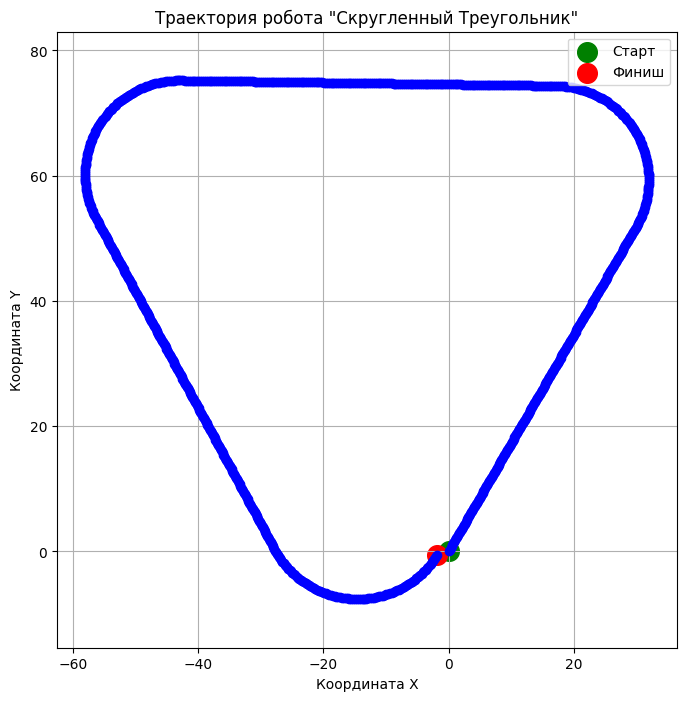

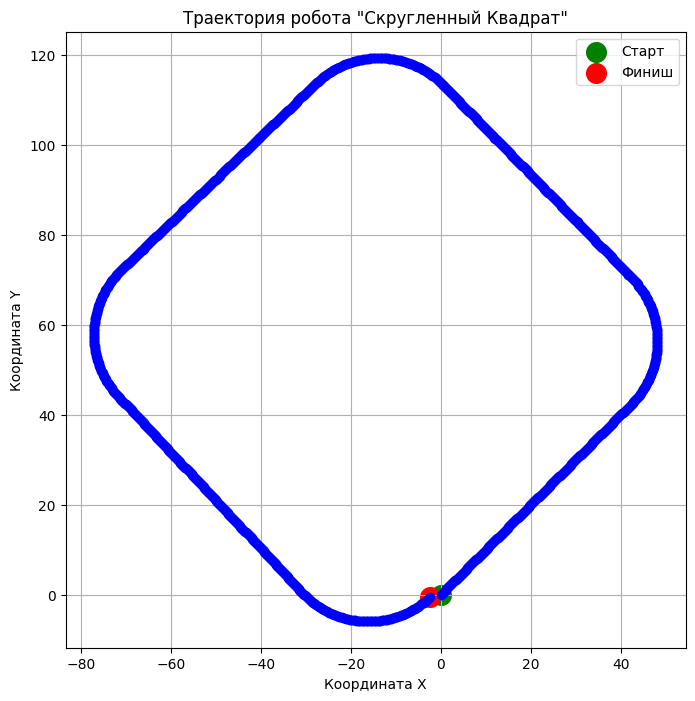

In [2]:
robot = Robot("Скругленный Треугольник")
robot.set_speed(30)
robot.set_direction(0)
robot.draw_rounded_polygon(n_sides=3, side_length=100, radius=20)
robot.draw_path()

robot_square = Robot("Скругленный Квадрат")
robot_square.set_speed(30)
robot_square.set_direction(0)
robot_square.draw_rounded_polygon(n_sides=4, side_length=100, radius=20)
robot_square.draw_path()
